# White Box - Supervised ML Project
__Name:__ Your Full Name

__Topic Name:__ Regression Topic or Classification Topic

## Introduction
Brief overview of the business challenge and dataset

### Problem Statement
Define the real-world problem the model aims to solve


### Objectives
List the key questions guiding your analysis and modeling:
- What features influence the target variable?
- Can feature engineering improve model performance?
- How do different model versions compare?


## Data Overview
__Load and inspect the dataset__
- Source and format
- .head(), .info(), .describe(),…


## Data Cleaning
__Handle missing values, outliers, and inconsistencies__
- Rename columns
- Fix data types
- Document assumptions


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# read csv file
df = pd.read_csv("vgsales.csv")

# rename NA_Sales to North_America_Sales
df = df.rename(columns={'NA_Sales': 'North_America_Sales'})
# rename EU_Sales to Europe_Sales
df = df.rename(columns={'EU_Sales': 'Europe_Sales'})
# rename JP_Sales to Japan_Sales
df = df.rename(columns={'JP_Sales': 'Japan_Sales'})
# rename Other_Sales to Other_Regions_Sales
df = df.rename(columns={'Other_Sales': 'Other_Regions_Sales'})

#change data types
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['North_America_Sales'] = pd.to_numeric(df['North_America_Sales'], errors='coerce')
df['Europe_Sales'] = pd.to_numeric(df['Europe_Sales'], errors='coerce')
df['Japan_Sales'] = pd.to_numeric(df['Japan_Sales'], errors='coerce')
df['Other_Regions_Sales'] = pd.to_numeric(df['Other_Regions_Sales'], errors='coerce')
df['Global_Sales'] = pd.to_numeric(df['Global_Sales'], errors='coerce')

# sort by year
df = pd.read_csv("vgsales.csv").sort_values('Year')

print(df.shape)
df.head()

(16598, 11)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6896,6898,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.0,0.00,0.24
2669,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
5366,5368,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34
1969,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
1766,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15


## Exploratory Data Analysis (EDA)
### Analysis
__Answer objectives using visual and statistical insights__
- Trends, relationships, anomalies
- Outlier and missing values treatment
- Univariate, bivariate, or multivariate analysis
    - Histograms, box plots, bar charts
    - Correlation matrix for continuous columns (required if applicable)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16598 entries, 6896 to 16493
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [3]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [4]:
# Handle missing values
df = df.dropna(subset=['Year'])
print(df.shape)

(16327, 11)


In [5]:
df['Publisher'].fillna('Unknown')

6896               Atari
2669          Activision
5366          Activision
1969               Atari
1766          Activision
              ...       
4820     Electronic Arts
16241               Sega
16438       Idea Factory
14390               Sega
5957             Ubisoft
Name: Publisher, Length: 16327, dtype: object

In [6]:
print(df.isnull().sum())

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64


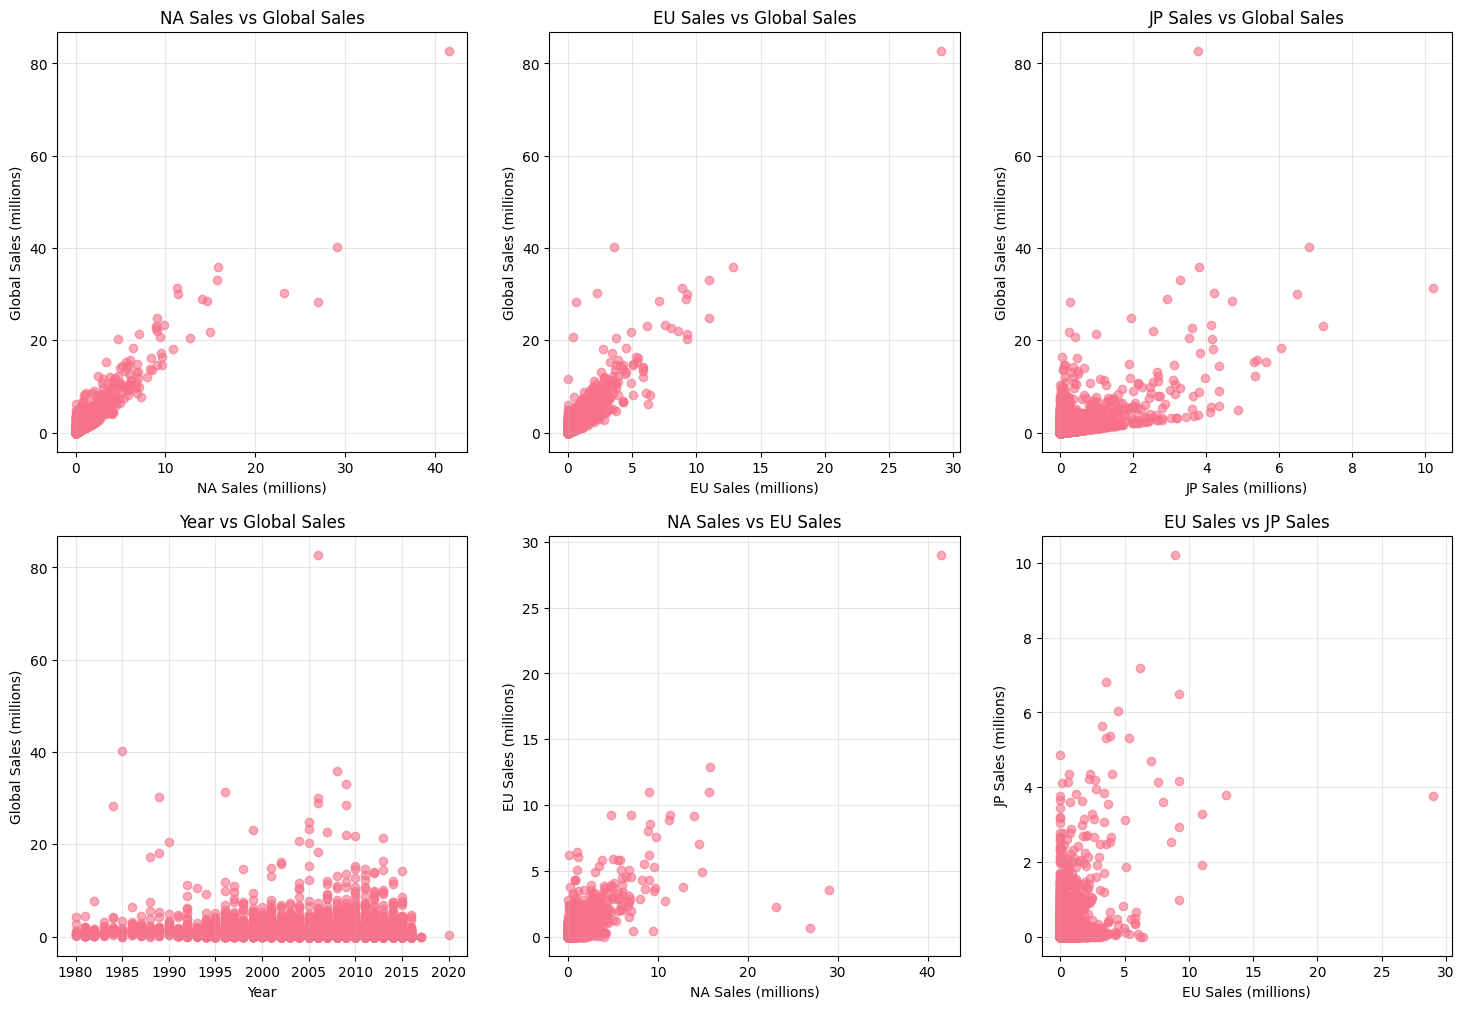

In [7]:
# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create scatter plots for key relationships
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Global Sales vs NA Sales
axes[0,0].scatter(df['NA_Sales'], df['Global_Sales'], alpha=0.6)
axes[0,0].set_xlabel('NA Sales (millions)')
axes[0,0].set_ylabel('Global Sales (millions)')
axes[0,0].set_title('NA Sales vs Global Sales')
axes[0,0].grid(True, alpha=0.3)

# 2. Global Sales vs EU Sales
axes[0,1].scatter(df['EU_Sales'], df['Global_Sales'], alpha=0.6)
axes[0,1].set_xlabel('EU Sales (millions)')
axes[0,1].set_ylabel('Global Sales (millions)')
axes[0,1].set_title('EU Sales vs Global Sales')
axes[0,1].grid(True, alpha=0.3)

# 3. Global Sales vs JP Sales
axes[0,2].scatter(df['JP_Sales'], df['Global_Sales'], alpha=0.6)
axes[0,2].set_xlabel('JP Sales (millions)')
axes[0,2].set_ylabel('Global Sales (millions)')
axes[0,2].set_title('JP Sales vs Global Sales')
axes[0,2].grid(True, alpha=0.3)

# 4. Year vs Global Sales
axes[1,0].scatter(df['Year'], df['Global_Sales'], alpha=0.6)
axes[1,0].set_xlabel('Year')
axes[1,0].set_ylabel('Global Sales (millions)')
axes[1,0].set_title('Year vs Global Sales')
axes[1,0].grid(True, alpha=0.3)

# 5. NA Sales vs EU Sales
axes[1,1].scatter(df['NA_Sales'], df['EU_Sales'], alpha=0.6)
axes[1,1].set_xlabel('NA Sales (millions)')
axes[1,1].set_ylabel('EU Sales (millions)')
axes[1,1].set_title('NA Sales vs EU Sales')
axes[1,1].grid(True, alpha=0.3)

# 6. EU Sales vs JP Sales
axes[1,2].scatter(df['EU_Sales'], df['JP_Sales'], alpha=0.6)
axes[1,2].set_xlabel('EU Sales (millions)')
axes[1,2].set_ylabel('JP Sales (millions)')
axes[1,2].set_title('EU Sales vs JP Sales')
axes[1,2].grid(True, alpha=0.3)

plt.show()

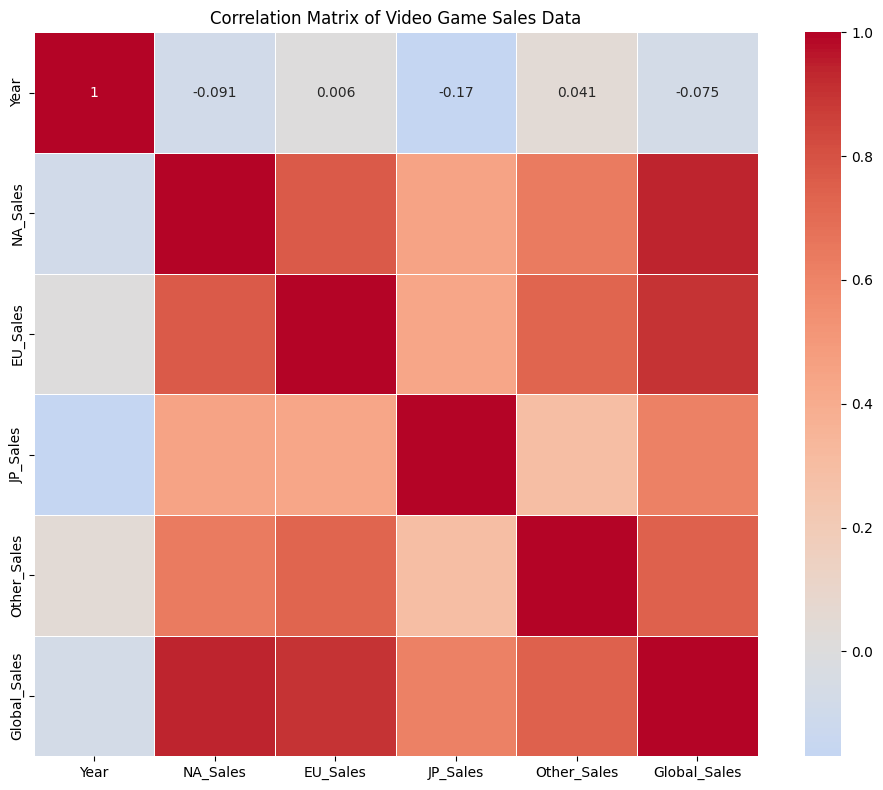

In [8]:
# Select numerical columns for correlation analysis
numerical_cols = ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
           square=True, linewidths=0.5)
plt.title('Correlation Matrix of Video Game Sales Data')
plt.tight_layout()
plt.show()

### Data Handling for Modeling
- __Transform, encode, and prepare features__
    - Categorical encoding
    - Feature scaling (especially for KNN)


## Model Building
__Build and compare two models for your topic__
### Model 1: Linear / Logistic Regression
- Version 1: baseline
- Version 2: modified features or tuned parameters
- Checking if model assumptions were met
 ...


In [9]:
# Features (X) and Target (y)
X = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = df['Global_Sales']

In [10]:
# Splitting the data: 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
# Implement and Train Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
# Prediction and Evaluation ---
y_pred_linear = linear_model.predict(X_test)

In [13]:
# Calculate metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

In [14]:
print("Linear Regression Results:")
print(f"Mean Squared Error (MSE): {mse_linear:.4f}")
print(f"R-squared (R²): {r2_linear:.4f}")
print("Coefficients (how much each regional sale contributes to the prediction):")
# Outputting coefficients for interpretability
for feature, coef in zip(X.columns, linear_model.coef_):
    print(f"  {feature}: {coef:.4f}")

Linear Regression Results:
Mean Squared Error (MSE): 0.0000
R-squared (R²): 1.0000
Coefficients (how much each regional sale contributes to the prediction):
  NA_Sales: 1.0000
  EU_Sales: 1.0000
  JP_Sales: 1.0000
  Other_Sales: 0.9990


### Model 2: KNN Regressor / KNN Classifier
- Version 1: baseline
- Version 2: modified features or tuned parameters
- Checking if model assumptions were met 
 ...


### Model Evaluation
__Use appropriate metrics based on task type and compare between the Models and their versions__

__For Regression:__
- R² Score
- Root Mean Squared Error (RMSE)
- Residual plots


__For Classification:__
- Accuracy
- Precision
- Recall
- F1 Score
- ROC-AUC _**(Optional)**_
- Confusion Matrix

_Include visualizations and interpretation for each metric._


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [16]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Features have been scaled using StandardScaler.")

Features have been scaled using StandardScaler.


In [17]:
# Implement and Train KNN Regressor
k = 5
print(f"Training KNN Regressor with k = {k}...")
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train_scaled, y_train)

Training KNN Regressor with k = 5...


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [18]:
# Prediction and Evaluation
y_pred_knn = knn_model.predict(X_test_scaled)

In [19]:
# Calculate metrics
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
# Calculate residuals
residuals = y_test - y_pred_knn

In [20]:
print("\n--- KNN Regressor Results (k=5) ---")
print(f"Mean Squared Error (MSE): {mse_knn:.4f}")
print(f"R-squared (R²): {r2_knn:.4f}")
print(f"Note: KNN requires scaled data to calculate accurate distances between points.")
print(f"Residulas = {residuals}")


--- KNN Regressor Results (k=5) ---
Mean Squared Error (MSE): 0.8034
R-squared (R²): 0.7932
Note: KNN requires scaled data to calculate accurate distances between points.
Residulas = 11061    0.000000e+00
13660    0.000000e+00
2194     8.000000e-03
6622     0.000000e+00
7017    -2.775558e-17
             ...     
2102    -5.600000e-02
6202     1.000000e-02
6405     2.000000e-03
5971     2.200000e-02
15314   -2.000000e-03
Name: Global_Sales, Length: 4082, dtype: float64


### Model Comparison
__Compare performance across models and versions__

__Note:__ _Use Bullet Points or table_
- Which model performed best and why
- Impact of feature changes or tuning
- Generalization and overfitting observations


In [21]:
if r2_linear > r2_knn:
    print("Linear regression is working best")
else:
    print("KNN regression is working best")

if mse_linear < mse_knn:
    print("Linear regression is working best")
else:
    print("KNN regression is working best")

Linear regression is working best
Linear regression is working best


## Final Model & Insights
__Summarize your final model and key takeaways__

__Note__: _Use Bullet Points_
- Final model choice
- Business implications
- Limitations and future improvements


The best model is "Linear Regression"

## References & Appendix
__Cite tools, libraries, and sources used__